In [1]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces

class SDEEnv(gym.Env):
    def __init__(self):
        super(SDEEnv, self).__init__()
        # State is [y1, y2]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(2,), dtype=np.float32)
        
        # Actions are [u1, u2], both in some control range
        self.action_space = spaces.Box(low=-1, high=1, shape=(2,), dtype=np.float32)
        
        # Time step for numerical integration
        self.dt = 0.01
        
        # Initial values for state variables y1 and y2
        self.state = np.array([1.0, 1.0])  # You can set this based on the problem
        
    def reset(self):
        # Reset the state to initial values
        self.state = np.array([1.0, 1.0])
        return self.state, {}

    def step(self, action):
        u1, u2 = action
        y1, y2 = self.state
        
        dt = self.dt
        
        # Deterministic part of the system (first equation)
        dy1 = -(u1 + 0.5 * u1**2 * y1 + 0.5 * u2 * y2 / (y1 + y2)) * dt
        
        # Stochastic part of the second equation
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener process for stochastic term
        dy2 = (u1 * y1 - 0.7 * u2 * y1) * dt + (0.1 * np.sqrt(y1)) * dW
        
        # Update states
        y1 += dy1
        y2 += dy2
        
        # Ensure non-negative concentrations
        y1 = max(0, y1)
        y2 = max(0, y2)
        
        self.state = np.array([y1, y2])
        
        # Reward is based on maximizing y2
        reward = y2
        
        # Done if the system has run too long or if values go out of bounds
        done = False
        if y1 < 0.1 or y2 < 0.1:
            done = True
        
        return self.state, reward, done, False, {}

    def render(self):
        # Optional rendering for visualization, not essential
        print(f"State: y1={self.state[0]}, y2={self.state[1]}")


In [ ]:
from stable_baselines3 import PPO
from sde_rl_env import SDEEnv

# Create the environment
env = SDEEnv()

# Instantiate the agent
model = PPO("MlpPolicy", env, verbose=1)

# Train the agent
model.learn(total_timesteps=10000)

# Save the trained model
model.save("sde_ppo")

# Test the trained agent
obs = env.reset()
for _ in range(100):
    action, _states = model.predict(obs)
    obs, reward, done, _, _ = env.step(action)
    env.render()
    if done:
        break


In [9]:

class SDEEnv_train(gym.Env):
    """ will remove the stoichastic part of the system """
    def __init__(self):
        super(SDEEnv_train, self).__init__()
        # State is [y1, y2]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(2,), dtype=np.float32)
        
        # Actions are [u1, u2], both in some control range
        self.action_space = spaces.Box(low=0, high=10, shape=(2,), dtype=np.float32)
        
        # Time step for numerical integration
        self.dt = 0.001
        
        # Initial values for state variables y1 and y2
        self.state = np.array([1, 1])  # You can set this based on the problem
        
    def reset(self,seed = None,options = None):
        # Reset the state to initial values
        self.state = np.array([0.1, 0.1])
        return self.state

    def step(self, action):
        u1, u2 = action
        y1, y2 = self.state
        
        dt = self.dt
        
        # Deterministic part of the system (first equation)
        dy1 = -(u1 + 0.5 * u1**2 * y1 + 0.5 * u2 * y2 / (y1 + y2)) * dt
        
        # Stochastic part of the second equation
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener process for stochastic term
        dy2 = (u1 * y1 - 0.7 * u2 * y1) * dt + (0.1 * np.sqrt(y1)) 
        
        
        # Update states
        y1 += dy1
        y2 += dy2
        
        # Ensure non-negative concentrations
        #y1 = max(0, y1)
        #y2 = max(0, y2)
        
        self.state = np.array([y1, y2])
        
        # Reward is based on maximizing y2
        reward = y2*10
        
        # Done if the system has run too long or if values go out of bounds
        done = False
        if y1 < .01 or y2 < .01:
            reward = -1000
            done = True
        
        return self.state, reward, done, False, {}

    def render(self):
        # Optional rendering for visualization, not essential
        print(f"State: y1={self.state[0]}, y2={self.state[1]}")


In [11]:

class SDEEnv_train_2(gym.Env):
    """ nothing will change ,expcep that its stoichastic """
    def __init__(self):
        super(SDEEnv_train_2, self).__init__()
        # State is [y1, y2]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(2,), dtype=np.float32)
        
        # Actions are [u1, u2], both in some control range
        self.action_space = spaces.Box(low=0, high=10, shape=(2,), dtype=np.float32)
        
        # Time step for numerical integration
        self.dt = 0.001
        
        # Initial values for state variables y1 and y2
        self.state = np.array([1, 1])  # You can set this based on the problem
        
    def reset(self,seed = None,options = None):
        # Reset the state to initial values
        self.state = np.array([0.1, 0.1])
        return self.state

    def step(self, action):
        u1, u2 = action
        y1, y2 = self.state
        
        dt = self.dt
        
        # Deterministic part of the system (first equation)
        dy1 = -(u1 + 0.5 * u1**2 * y1 + 0.5 * u2 * y2 / (y1 + y2)) * dt
        
        # Stochastic part of the second equation
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener process for stochastic term
        dy2 = (u1 * y1 - 0.7 * u2 * y1) * dt + (0.1 * np.sqrt(y1)) * dW
        
        
        # Update states
        y1 += dy1
        y2 += dy2
        
        # Ensure non-negative concentrations
        #y1 = max(0, y1)
        #y2 = max(0, y2)
        
        self.state = np.array([y1, y2])
        
        # Reward is based on maximizing y2
        reward = y2*100
        
        # Done if the system has run too long or if values go out of bounds
        done = False
        if y1 < 0 or y2 < 0:
            reward = -1000
            done = True
        
        return self.state, reward, done, False, {}

    def render(self):
        # Optional rendering for visualization, not essential
        print(f"State: y1={self.state[0]}, y2={self.state[1]}")


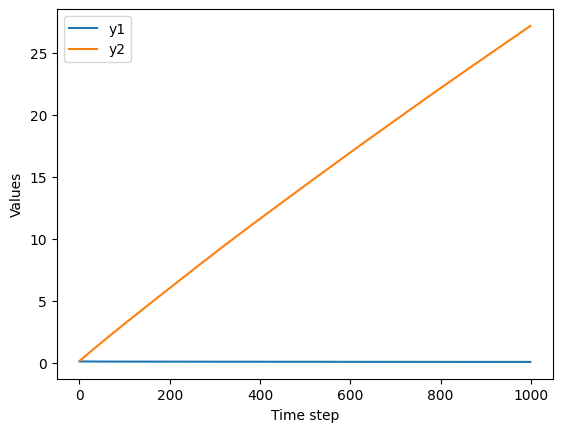

In [10]:
from stable_baselines3 import PPO
env = SDEEnv_train()
model =PPO.load('sde_train_TD31.zip')


import matplotlib.pyplot as plt

y1_values = []
y2_values = []

obs = env.reset()
for _ in range(1000):
    action, _states = model.predict(obs)
    obs, reward, done, _, _ = env.step(action)
    y1_values.append(obs[0])
    y2_values.append(obs[1])
    if done:
        break

# Plot the results
plt.plot(y1_values, label='y1')
plt.plot(y2_values, label='y2')
plt.xlabel('Time step')
plt.ylabel('Values')
plt.legend()
plt.show()

training the model again in the stoichastic process 


In [16]:
env_2= SDEEnv_train_2()
model_2 =PPO.load('sde_train_TD31.zip',env=env_2)
model_2.learn(total_timesteps=100000)
model_2.save("sde_train_ppo_double_trained")

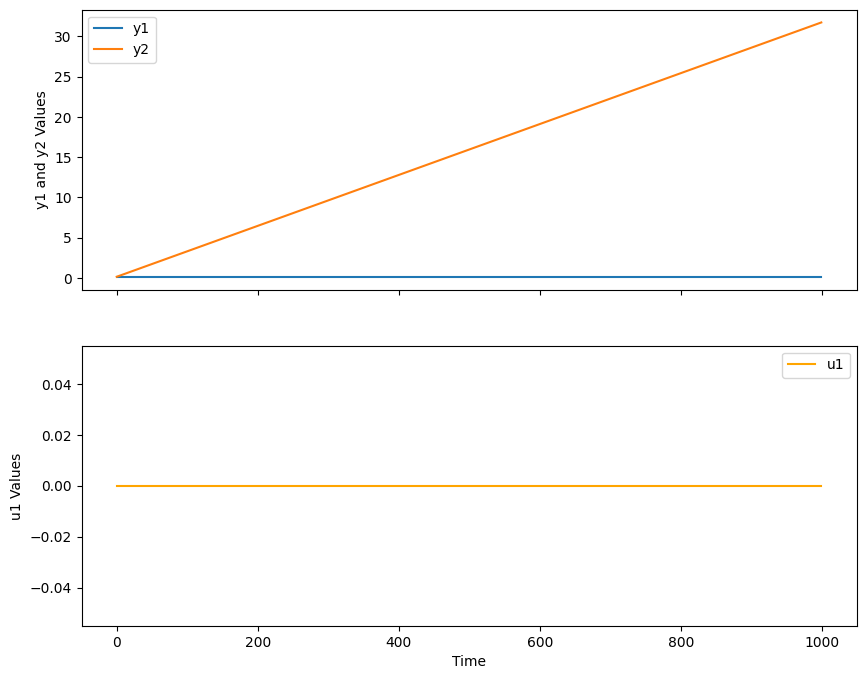

In [47]:

y1_values = []
y2_values = []
u1_values = []
time=[]
env= SDEEnv_train()
obs = env.reset()
for t in range(1000):
    action, _states = model_2.predict(obs)
    obs, reward, done, _, _ = env.step(action)
    y1_values.append(obs[0])
    y2_values.append(obs[1])
    u1_values.append(action[1])
    time.append(t)
    if done:
        break

# Plot the results
import matplotlib.pyplot as plt

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Plot y1 and y2 in the first subplot
ax1.plot(time, y1_values, label='y1')
ax1.plot(time, y2_values, label='y2')
ax1.set_ylabel('y1 and y2 Values')
ax1.legend()

# Plot u1 in the second subplot
ax2.plot(time, u1_values, label='u1', color='orange')
ax2.set_xlabel('Time')
ax2.set_ylabel('u1 Values')
ax2.legend()

# Show the plot
plt.show()